In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, RobustScaler, FunctionTransformer, PowerTransformer
from sklearn.model_selection import train_test_split,GridSearchCV,KFold, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer,make_column_selector
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC,SVR
from collections import Counter
from scipy import stats
from xgboost import XGBClassifier, XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn import set_config
from catboost import CatBoostRegressor

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/config/workspace/SCMS_Delivery_History.csv')

### Dataset Attributes Information

This dataset is sourced from : https://data.usaid.gov/HIV-AIDS/Supply-Chain-Shipment-Pricing-Data/a3rc-nmf6

In [3]:
pd.set_option('display.max_columns', None)
df.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2-Jun-06,2-Jun-06,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,NaN,Test kit,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,14-Nov-06,14-Nov-06,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,Date Not Captured,27-Aug-06,27-Aug-06,27-Aug-06,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,NaN,Test kit,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,1-Sep-06,1-Sep-06,1-Sep-06,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,11-Aug-06,11-Aug-06,11-Aug-06,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,Generic,30mg,Capsule,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


In [4]:
df.tail()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
10319,86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,10/16/14,N/A - From RDC,31-Jul-15,15-Jul-15,20-Jul-15,ARV,Pediatric,SCMS from RDC,"Lamivudine/Nevirapine/Zidovudine 30/50/60mg, d...",Lamivudine/Nevirapine/Zidovudine,Generic,30/50/60mg,Chewable/dispersible tablet - FDC,60,166571,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",No,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),705.79
10320,86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,10/24/14,N/A - From RDC,31-Jul-15,6-Aug-15,7-Aug-15,ARV,Adult,SCMS from RDC,"Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs",Lamivudine/Zidovudine,Generic,150/300mg,Tablet - FDC,60,21072,137389.44,6.52,0.11,Hetero Unit III Hyderabad IN,No,See DN-4313 (ID#:83921),See DN-4313 (ID#:83921),161.71
10321,86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,8/12/14,N/A - From RDC,31-Aug-15,25-Aug-15,3-Sep-15,ARV,Adult,SCMS from RDC,Efavirenz/Lamivudine/Tenofovir Disoproxil Fuma...,Efavirenz/Lamivudine/Tenofovir Disoproxil Fuma...,Generic,600/300/300mg,Tablet - FDC,30,514526,5140114.74,9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,No,Weight Captured Separately,Freight Included in Commodity Cost,5284.04
10322,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,7/1/15,N/A - From RDC,9-Sep-15,4-Aug-15,11-Aug-15,ARV,Adult,SCMS from RDC,"Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs",Lamivudine/Zidovudine,Generic,150/300mg,Tablet - FDC,60,17465,113871.80,6.52,0.11,Mylan (formerly Matrix) Nashik,Yes,1392,Freight Included in Commodity Cost,134.03
10323,86823,103-ZW-T30,FPQ-15197,SO-50022,DN-4336,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,10/16/14,N/A - From RDC,31-Aug-15,4-Aug-15,11-Aug-15,ARV,Pediatric,SCMS from RDC,"Lamivudine/Zidovudine 30/60mg, dispersible tab...",Lamivudine/Zidovudine,Generic,30/60mg,Chewable/dispersible tablet - FDC,60,36639,72911.61,1.99,0.03,"Cipla, Goa, India",No,Weight Captured Separately,Freight Included in Commodity Cost,85.82


In [5]:
df.shape

(10324, 33)

In [6]:
df.columns

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

In [7]:
#drop unnecessary columns as they are not required for model training
columns_to_drop =  ['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #','Item Description','PQ First Sent to Client Date','PO Sent to Vendor Date']

df = df.drop(columns=columns_to_drop)

In [8]:
#change datetype of date columns to datetime dtype
df['Scheduled Delivery Date'] = pd.to_datetime(df['Scheduled Delivery Date'])
df['Delivered to Client Date'] = pd.to_datetime(df['Delivered to Client Date'])
df['Delivery Recorded Date'] = pd.to_datetime(df['Delivery Recorded Date'])

In [9]:
df_copy = df[['Scheduled Delivery Date','Delivered to Client Date','Delivery Recorded Date']]
df_copy['all_matching'] = df_copy.apply(lambda x: x['Scheduled Delivery Date'] == x['Delivered to Client Date'] == x['Delivery Recorded Date'], axis = 1)

In [156]:
#df_copy

In [157]:
#df_copy['diff'] = (df_copy['Delivery Recorded Date'] - df_copy['Delivered to Client Date']).dt.days

In [158]:
#df_copy

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Country                     10324 non-null  object        
 1   Managed By                  10324 non-null  object        
 2   Fulfill Via                 10324 non-null  object        
 3   Vendor INCO Term            10324 non-null  object        
 4   Shipment Mode               9964 non-null   object        
 5   Scheduled Delivery Date     10324 non-null  datetime64[ns]
 6   Delivered to Client Date    10324 non-null  datetime64[ns]
 7   Delivery Recorded Date      10324 non-null  datetime64[ns]
 8   Product Group               10324 non-null  object        
 9   Sub Classification          10324 non-null  object        
 10  Vendor                      10324 non-null  object        
 11  Molecule/Test Type          10324 non-null  object    

In [11]:
def unique_value_counts(df):

    uniques_values = {}
    for col in df:
        if df[col].dtype == 'object':
            uniques_values[col] = df[col].value_counts()[:20]
    
    return uniques_values

In [12]:
unique_categories = unique_value_counts(df)

for col in ['Country','Managed By','Vendor']:
    print(col,'\n=======')
    print(unique_categories[col])
    print('\n')

Country 
South Africa     1406
Nigeria          1194
Côte d'Ivoire    1083
Uganda            779
Vietnam           688
Zambia            683
Haiti             655
Mozambique        631
Zimbabwe          538
Tanzania          519
Rwanda            430
Congo, DRC        333
Guyana            237
Ethiopia          216
South Sudan       164
Kenya             111
Burundi            98
Namibia            95
Cameroon           75
Botswana           70
Name: Country, dtype: int64


Managed By 
PMO - US                     10265
South Africa Field Office       57
Haiti Field Office               1
Ethiopia Field Office            1
Name: Managed By, dtype: int64


Vendor 
SCMS from RDC                                                        5404
Orgenics, Ltd                                                         754
S. BUYS WHOLESALER                                                    715
Aurobindo Pharma Limited                                              668
Trinity Biotech, Plc            

In [13]:
#check for missing values
print(df.isnull().sum()[df.isnull().sum().values>0].sort_values(ascending = False))
print('Total no. of missing values:',df.isnull().sum().sum())

Dosage                       1736
Shipment Mode                 360
Line Item Insurance (USD)     287
dtype: int64
Total no. of missing values: 2383


# Univariate Analysis

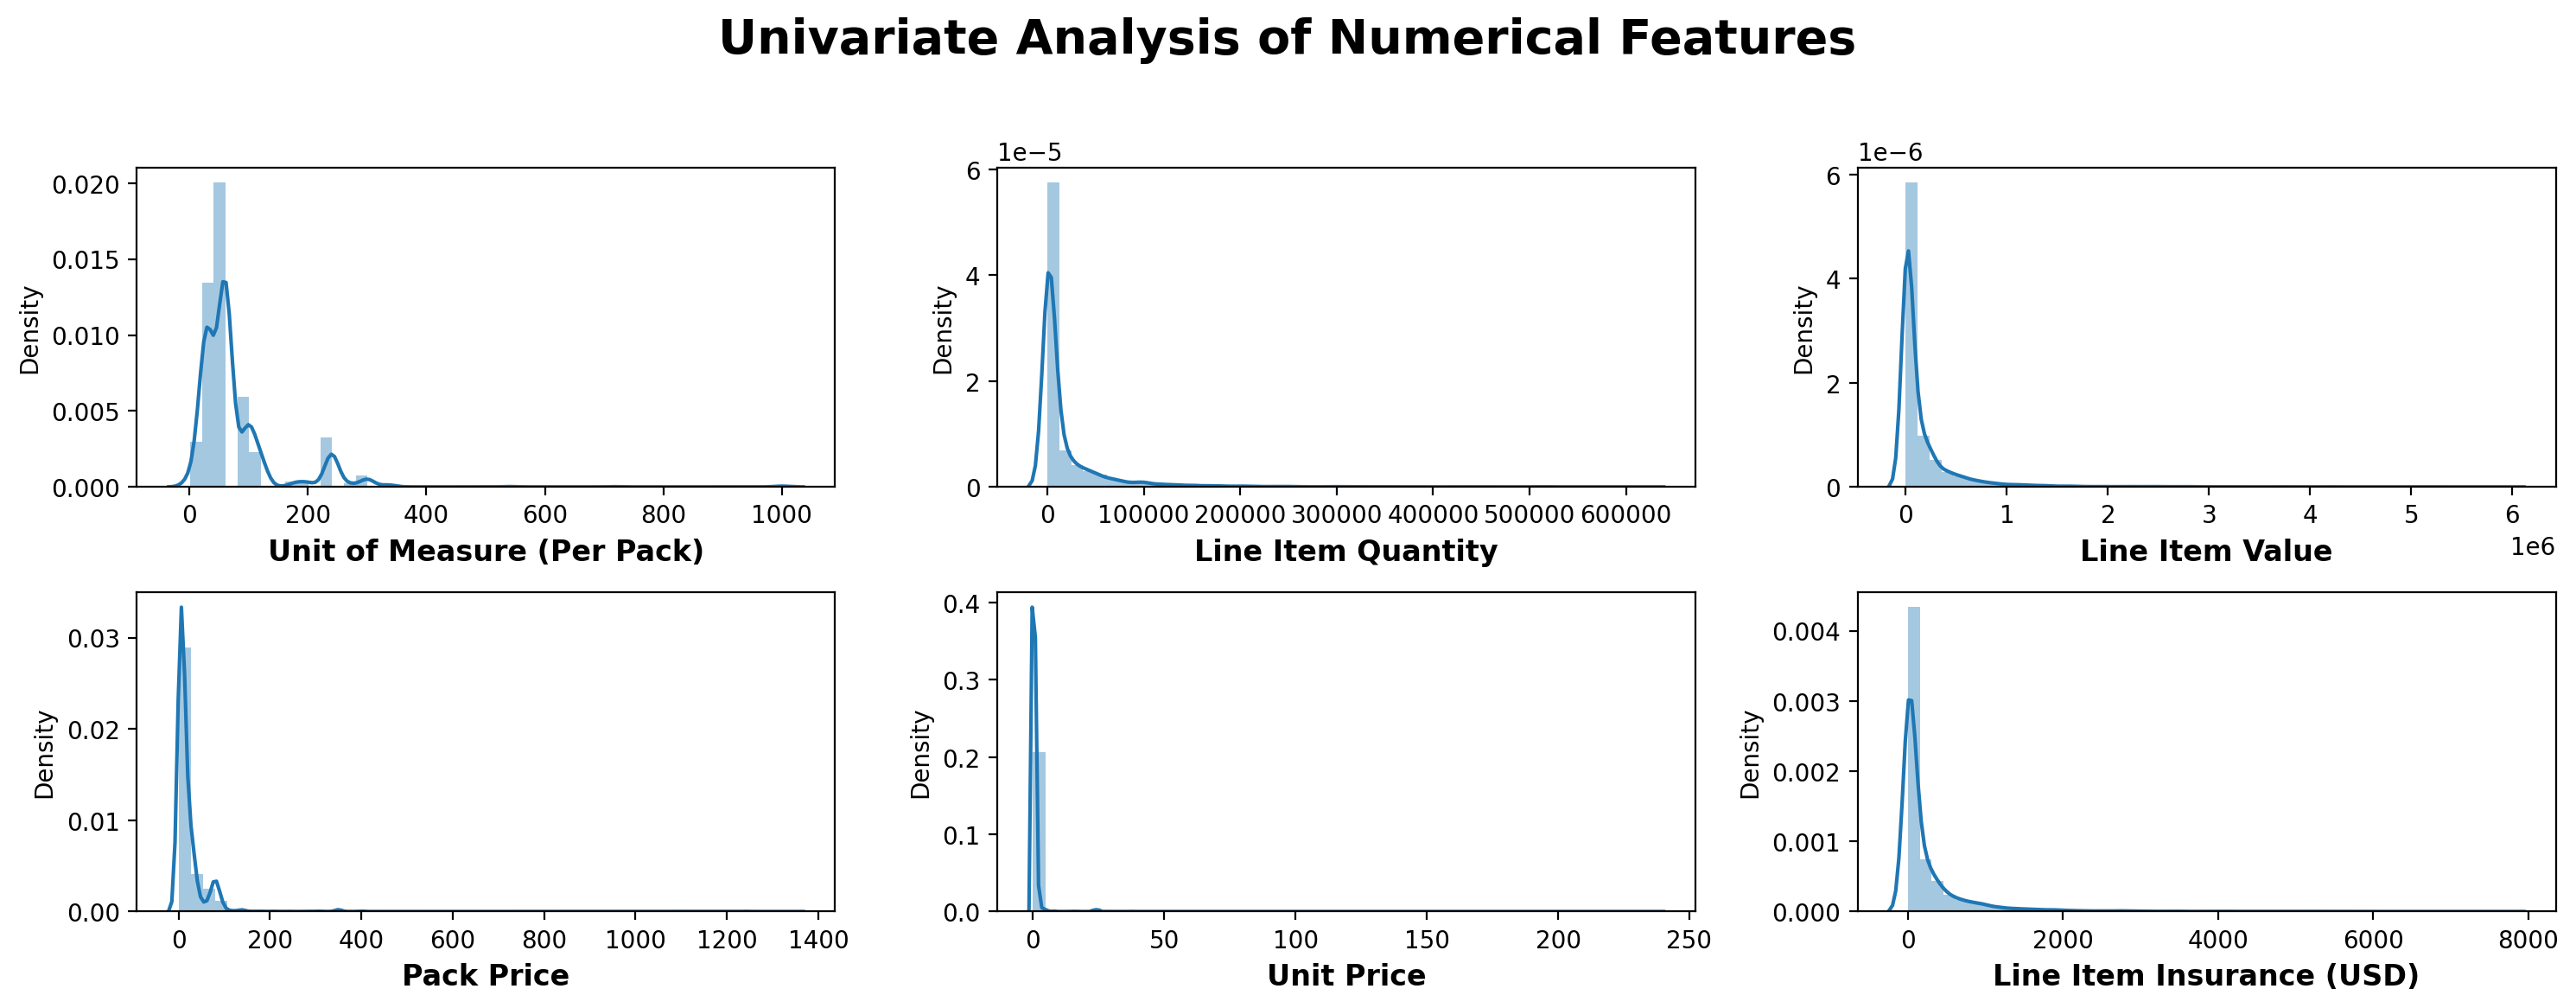

In [14]:
#check out the distribution of all numerical features

def univariate_plot_numerical(df):
    plt.figure(figsize=(15, 15),dpi=200)
    plt.suptitle('Univariate Analysis of Numerical Features',fontsize = 20, fontweight = 'bold',alpha = 1, y = 1.01)

    i = 0
    for col in df:
        if (df[col].dtype not in ['object','datetime64[ns]']):
            plt.subplot(6,3,i+1)
            sns.distplot(x = df[col])
            plt.xlabel(col, fontdict={'fontsize':12,'fontweight':'bold'})
            plt.tight_layout()
            i+=1
            
univariate_plot_numerical(df)

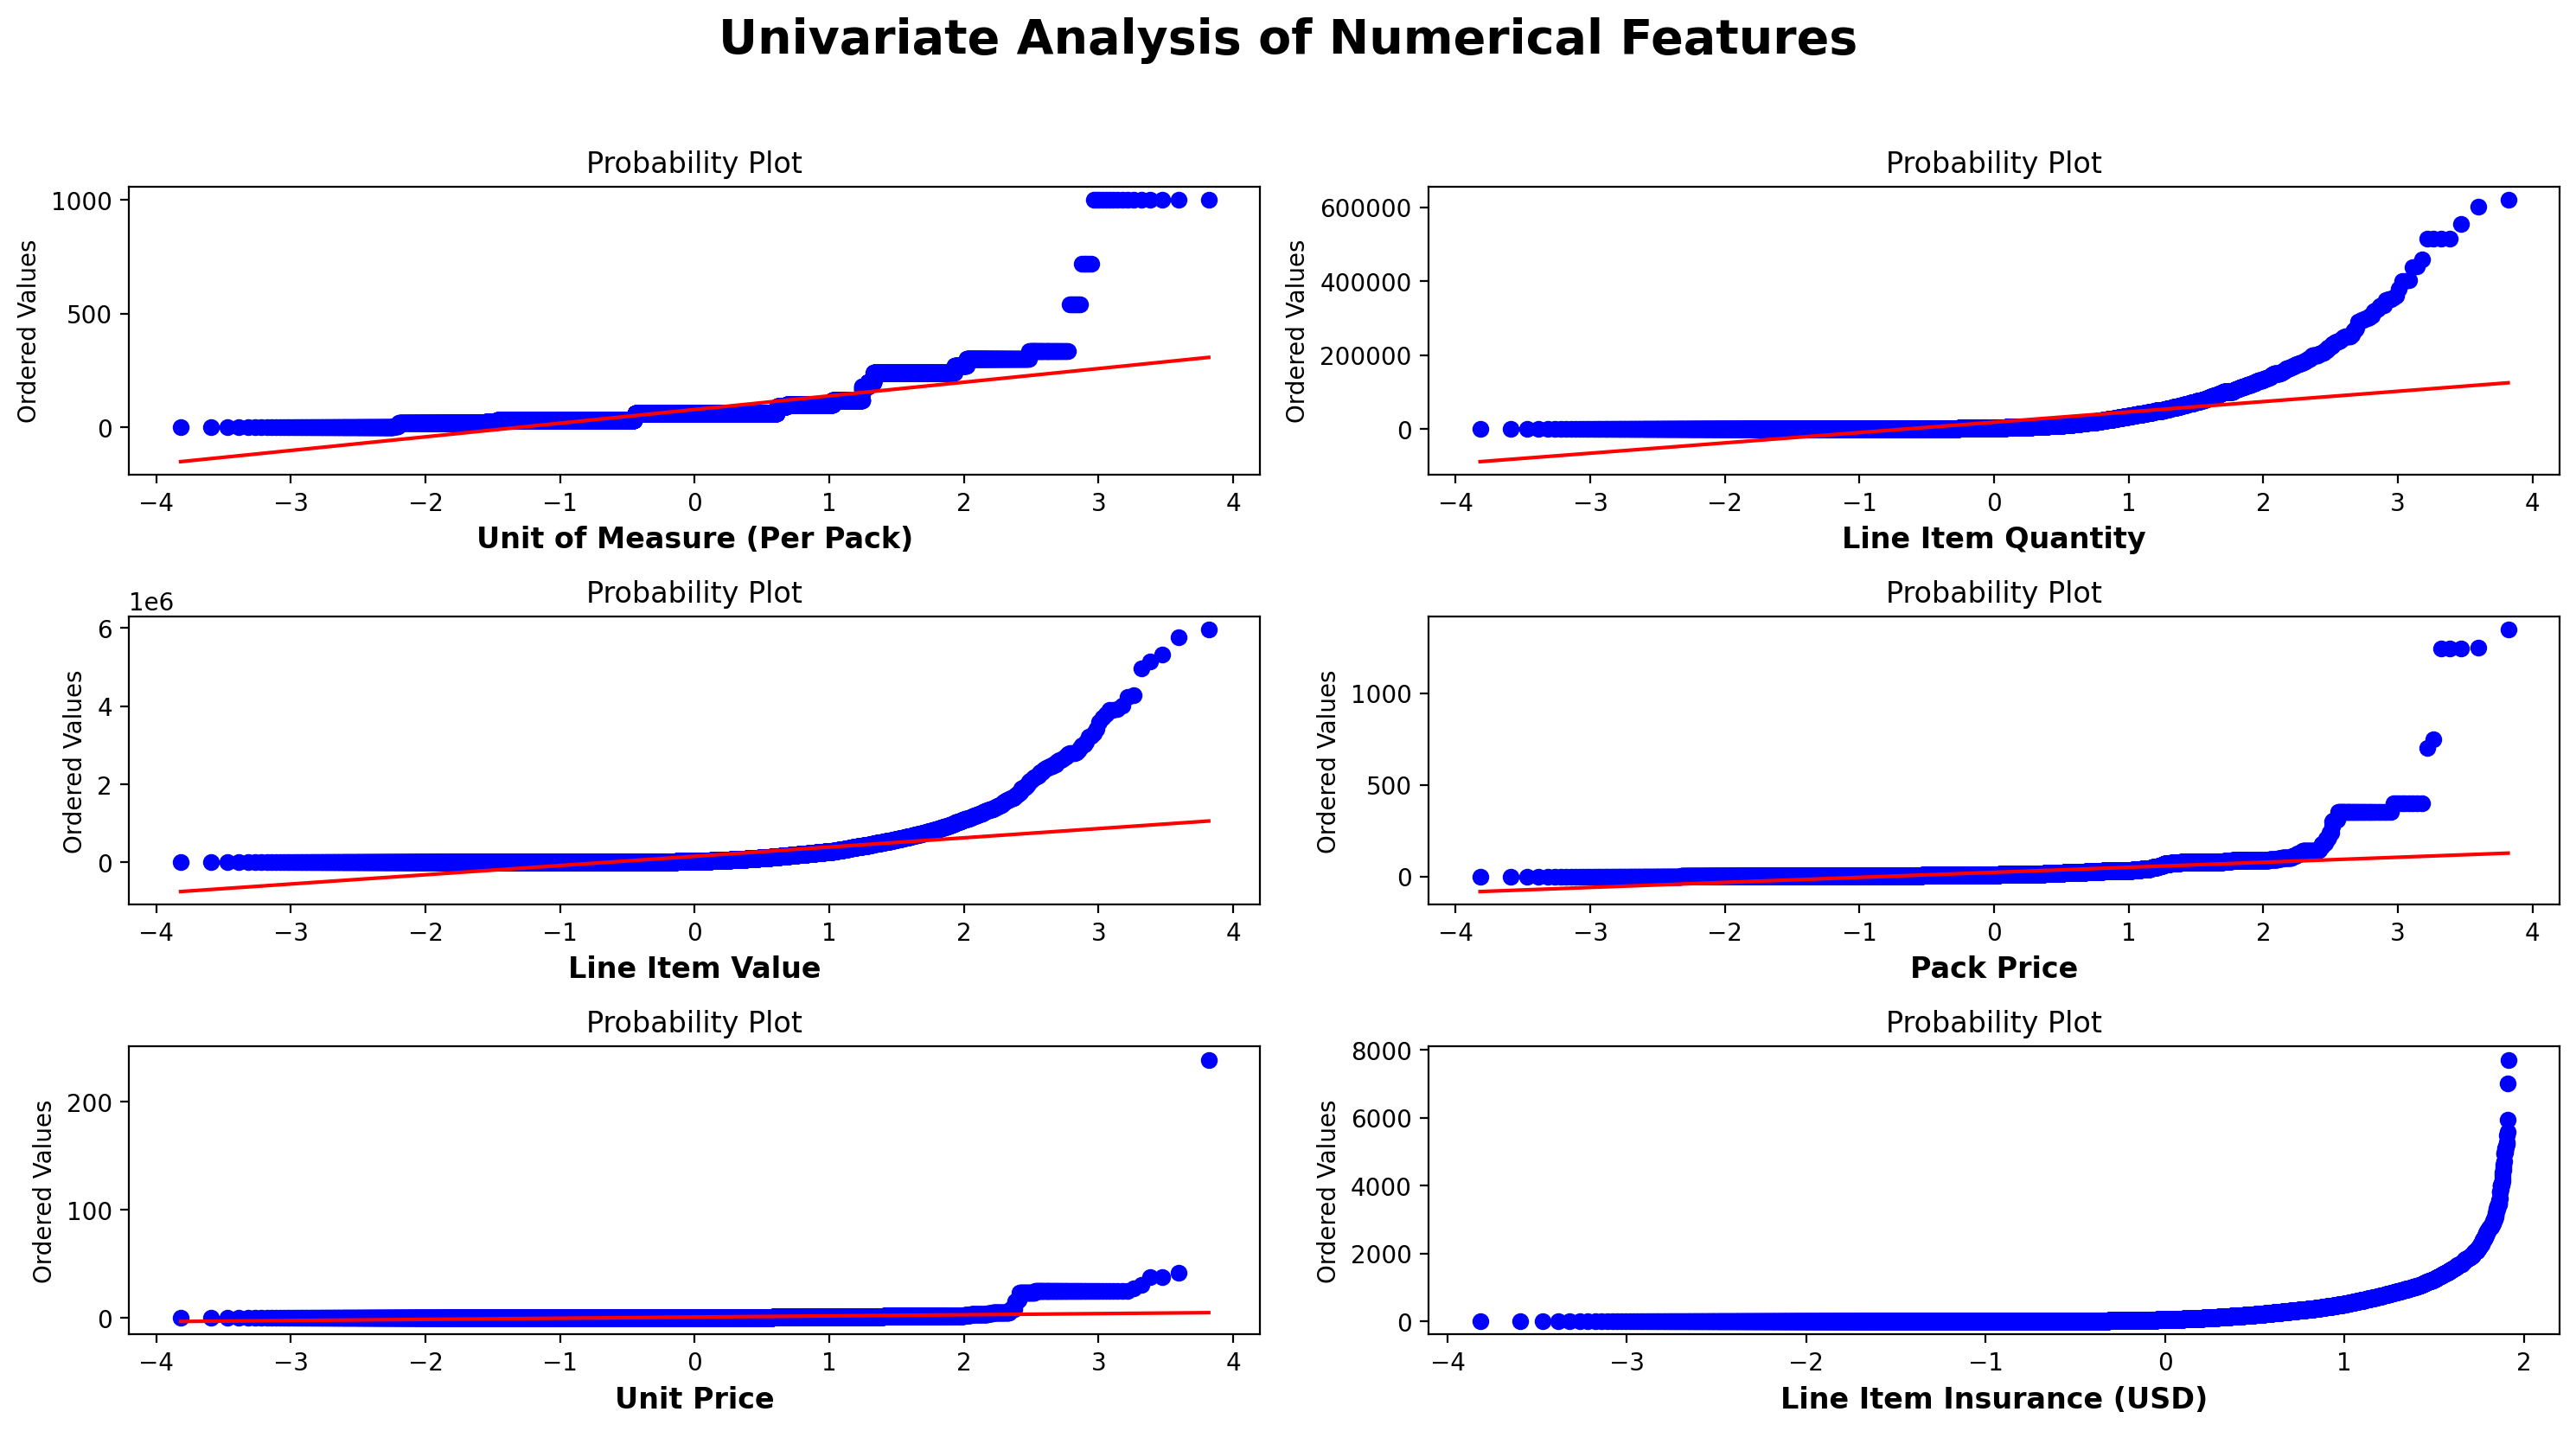

In [15]:
def univariate_plot_numerical(df):
    plt.figure(figsize=(15, 20),dpi=200)
    plt.suptitle('Univariate Analysis of Numerical Features',fontsize = 20, fontweight = 'bold',alpha = 1, y = 1.01)

    i = 0
    for col in df:
        if (df[col].dtype not in ['object','datetime64[ns]']):
            plt.subplot(8,2,i+1)
            stats.probplot(df[col],dist = 'norm', plot = plt)
            plt.xlabel(col, fontdict={'fontsize':12,'fontweight':'bold'})
            plt.tight_layout()
            i+=1
            
univariate_plot_numerical(df)

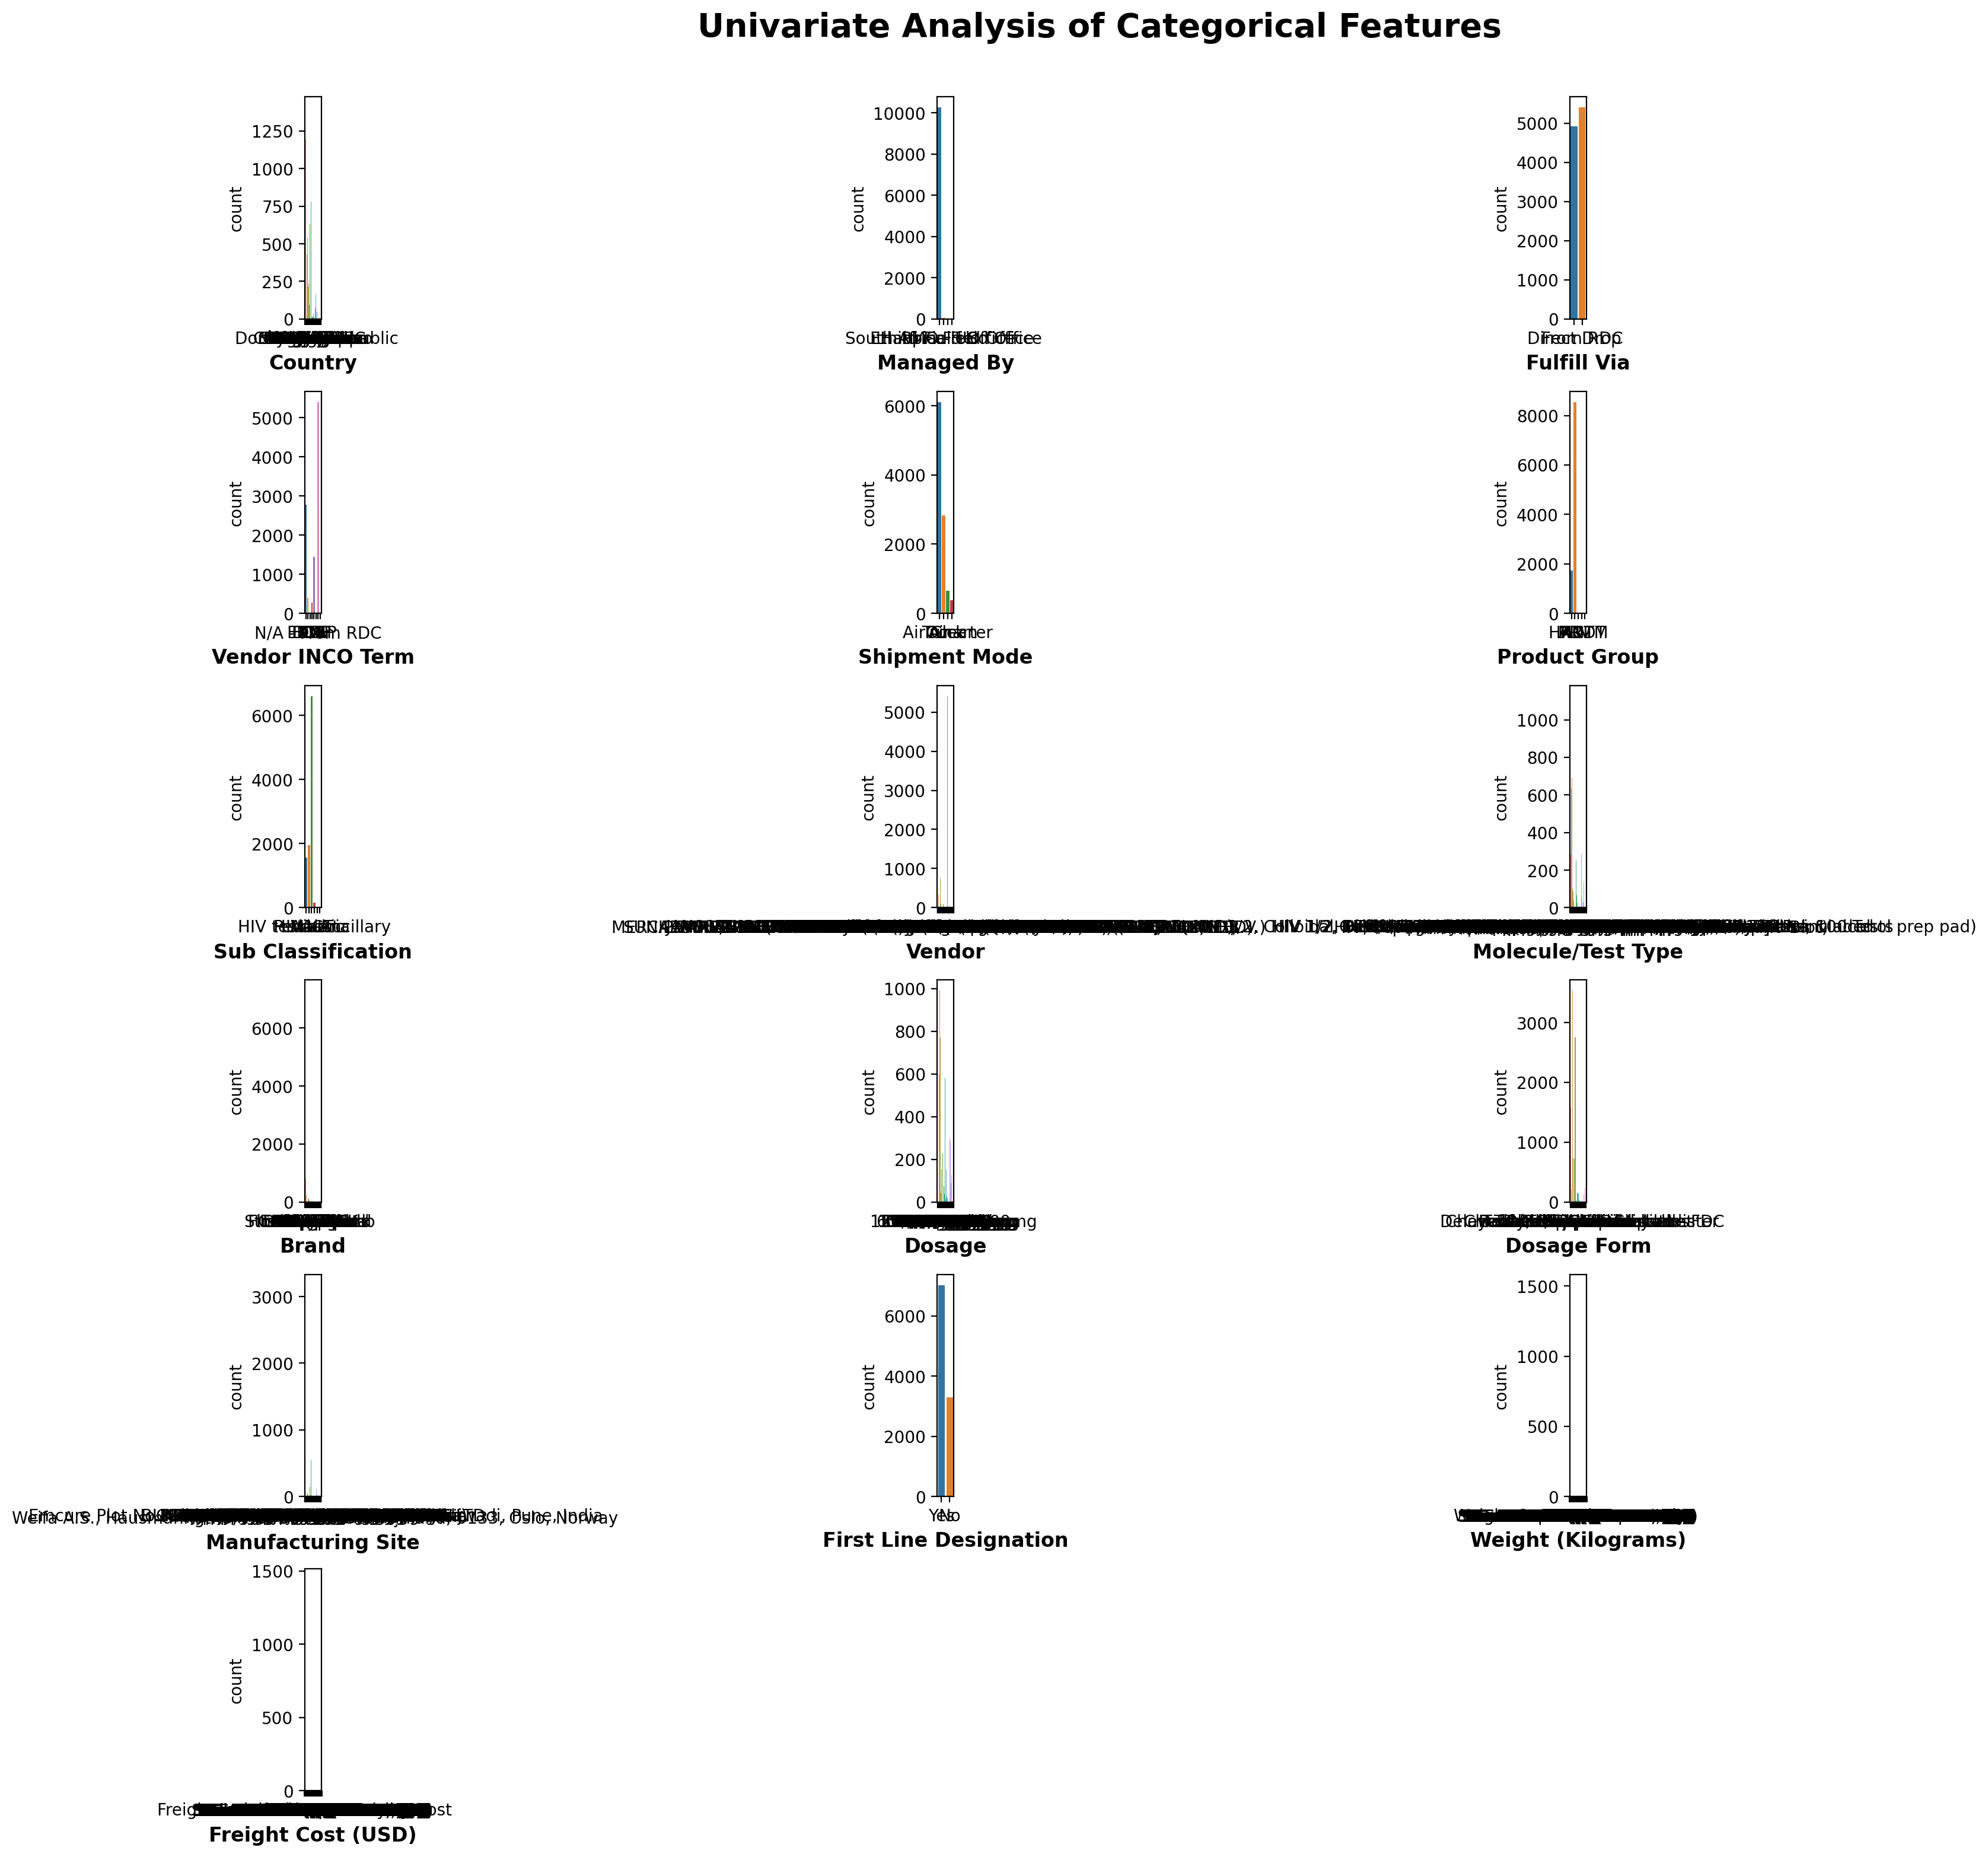

In [ ]:
top_20_countries = df['Country'].valu_counts() 

In [ ]:
#statistics of the dataset
df.describe()